<h1 style="color: green; text-align: center">Exploratory Data Analysis (Smartphone Data) </h1>
<hr width: 5px>
<h3>✍ written by : </h3>
<p><b>Maghouti</b> Aymane <br><b></b> Data engineering Student at the national school of applied sciences of alhociema <b>ENSAH</b></p>
<p style="text-align: right;"><b>23-December | <span style="color: red;">2023</span></b></p>

In [3]:
import pandas as pd 

In [21]:
df = pd.read_csv('smartphone_Data.csv')

In [24]:
df =df.drop(columns=['price'])

In [25]:
df.head()

brand  screen_size  ram    rom sim_type  battary  previous_price  \
0    Tecno         6.80  8.0  128.0     Dual   5000.0          2720.0   
1  Infinix         6.82  8.0  128.0     Dual   6000.0          1564.0   
2   XIAOMI         6.52  3.0   64.0     Dual   5000.0          1088.0   
3    Tecno         6.60  4.0  128.0     Dual   5000.0          1768.0   
4  Infinix         6.60  2.0   64.0     Dual   5000.0          1020.0   

   current_price  
0          104.0  
1           81.0  
2           52.0  
3           77.0  
4           50.0

# Encoding Categorical Variables

In [30]:
def map_brand_to_numeric(brand):
    brand_mapping = {
        'Maxfone': 1,
        'Infinix': 2,
        'Freeyond': 3,
        'XIAOMI': 4,
        'Tecno': 5,
        'Oppo': 6,
        'Nokia': 7,
        'Samsung': 8,
        'Huawei': 9,
        'Vivo': 10,
        'Realme': 11,
        'Sowhat': 12,
        'Apple':13,
        'Gionee' :14
    }
    
    return brand_mapping.get(brand, 0)

df['brand'] = df['brand'].apply(map_brand_to_numeric)

In [31]:
def map_sim_type_to_numeric(sim_type):
    sim_type_mapping = {
        'Dual': 1,
        'Single': 2
            }
    
    return sim_type_mapping.get(sim_type, 0)

df['sim_type'] = df['sim_type'].apply(map_sim_type_to_numeric)


In [32]:
df.head()

brand  screen_size  ram    rom  sim_type  battary  previous_price  \
0      5         6.80  8.0  128.0         1   5000.0          2720.0   
1      2         6.82  8.0  128.0         1   6000.0          1564.0   
2      4         6.52  3.0   64.0         1   5000.0          1088.0   
3      5         6.60  4.0  128.0         1   5000.0          1768.0   
4      2         6.60  2.0   64.0         1   5000.0          1020.0   

   current_price  
0          104.0  
1           81.0  
2           52.0  
3           77.0  
4           50.0

In [33]:
df['brand'].unique()

array([ 5,  2,  4,  3,  1,  9,  7,  8,  6, 12, 11, 13, 10, 14],
      dtype=int64)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           388 non-null    int64  
 1   screen_size     388 non-null    float64
 2   ram             388 non-null    float64
 3   rom             388 non-null    float64
 4   sim_type        388 non-null    int64  
 5   battary         388 non-null    float64
 6   previous_price  388 non-null    float64
 7   current_price   388 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 24.4 KB


In [35]:
df.describe()

brand  screen_size         ram         rom    sim_type  \
count  388.000000   388.000000  388.000000  388.000000  388.000000   
mean     5.904639     6.576134    5.899485  129.360825    1.028351   
std      2.575712     0.198653    3.397476   77.422855    0.166186   
min      1.000000     5.450000    1.000000    8.000000    1.000000   
25%      4.000000     6.500000    4.000000   64.000000    1.000000   
50%      6.000000     6.600000    6.000000  128.000000    1.000000   
75%      8.000000     6.670000    8.000000  128.000000    1.000000   
max     14.000000     6.900000   24.000000  256.000000    2.000000   

           battary  previous_price  current_price  
count   388.000000      388.000000     388.000000  
mean   4105.762887     2236.605670     116.164948  
std    1921.553844     1759.433386     100.920562  
min       0.000000      530.000000      29.000000  
25%    4455.750000     1360.000000      75.750000  
50%    5000.000000     1938.000000      94.000000  
75%    5000.000000     2720.000000     128.250000  
max    6000.000000    20400.000000    1067.000000

In [36]:
df.isnull().sum()

brand             0
screen_size       0
ram               0
rom               0
sim_type          0
battary           0
previous_price    0
current_price     0
dtype: int64

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Numerical Features

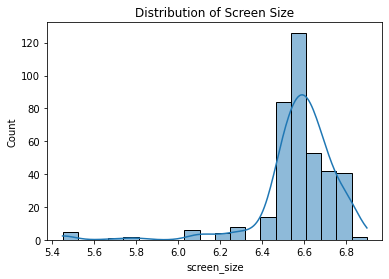

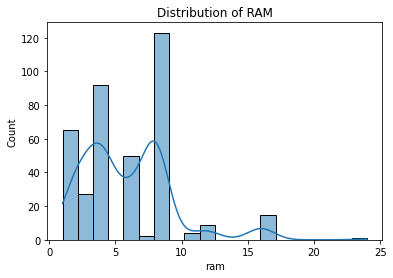

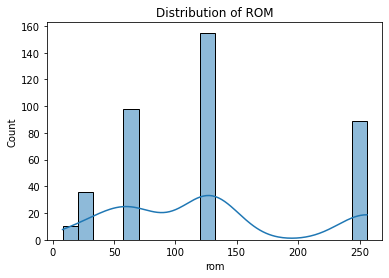

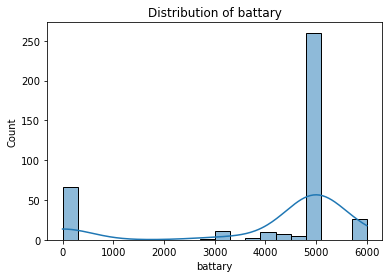

In [38]:
sns.histplot(df['screen_size'], bins=20, kde=True)
plt.title('Distribution of Screen Size')
plt.show()

sns.histplot(df['ram'], bins=20, kde=True)
plt.title('Distribution of RAM')
plt.show()

sns.histplot(df['rom'], bins=20, kde=True)
plt.title('Distribution of ROM')
plt.show()

sns.histplot(df['battary'], bins=20, kde=True)
plt.title('Distribution of battary')
plt.show()


# 2.Categorical Features


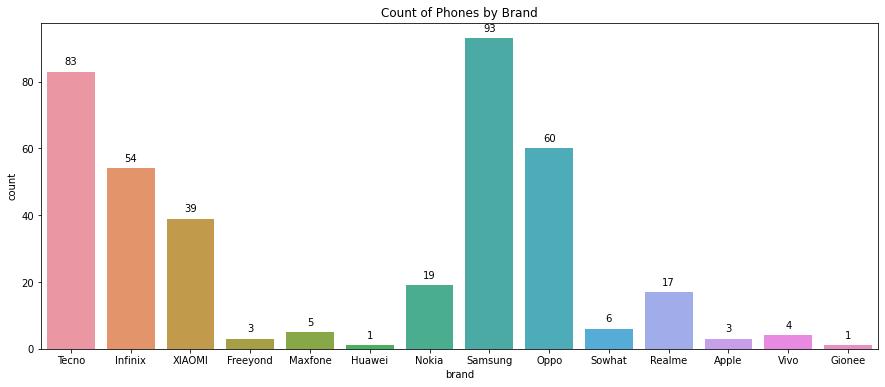

In [26]:
plt.figure(figsize=(15, 6))
ax1 = sns.countplot(x='brand', data=df)
plt.title('Count of Phones by Brand')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Correlation matrix

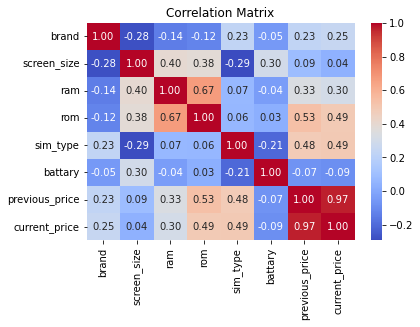

In [39]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 4.Price Analysis

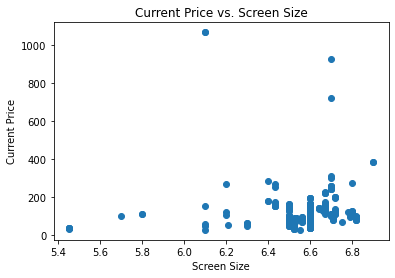

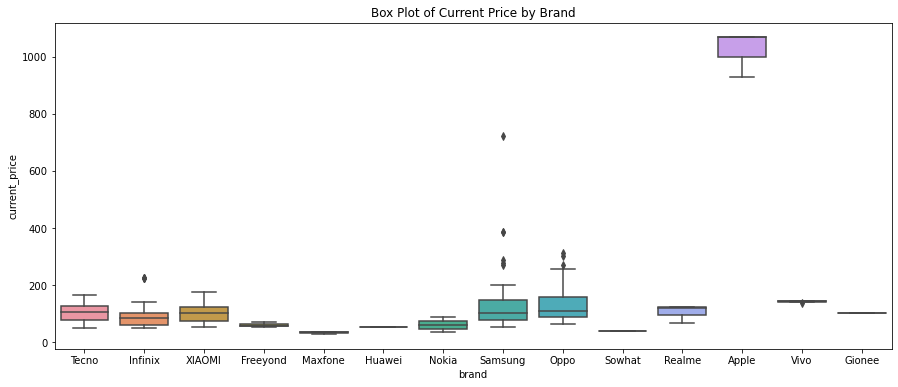

In [27]:
# Scatter plot of current price vs. screen size
plt.scatter(df['screen_size'], df['current_price'])
plt.title('Current Price vs. Screen Size')
plt.xlabel('Screen Size')
plt.ylabel('Current Price')
plt.show()

# Box plot for current price by brand
plt.figure(figsize=(15, 6))
sns.boxplot(x='brand', y='current_price', data=df)
plt.title('Box Plot of Current Price by Brand')
plt.show()

### Scatter plot of battery vs. current price

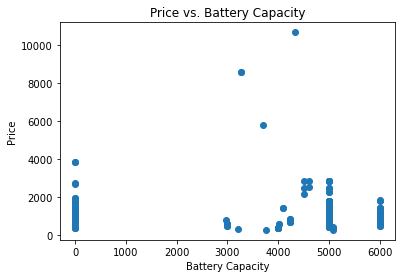

In [29]:
plt.scatter(df['battary'], df['current_price'])
plt.title('Price vs. Battery Capacity')
plt.xlabel('Battery Capacity')
plt.ylabel('current_Price')
plt.show()

### Pair plot for numerical features

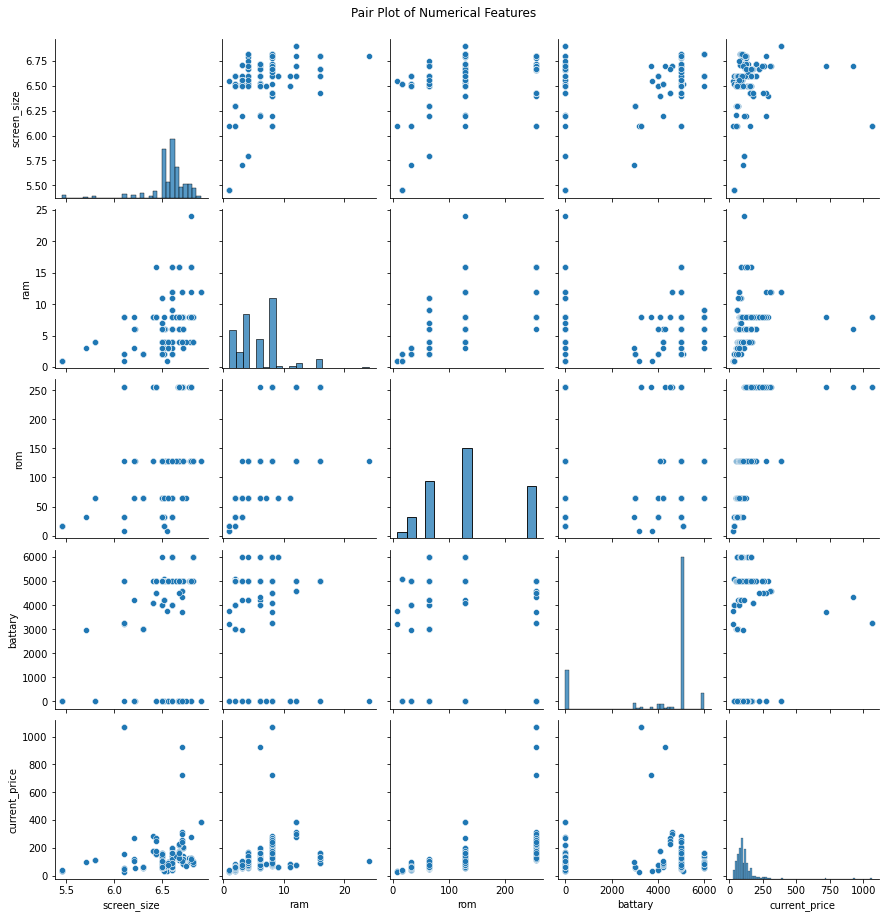

In [30]:
sns.pairplot(df[['screen_size', 'ram', 'rom', 'battary', 'current_price']])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

### Average current price by brand

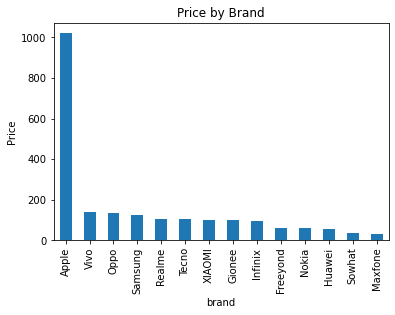

In [29]:
brand_price = df.groupby('brand')['current_price'].mean().sort_values(ascending=False)
brand_price.plot(kind='bar')
plt.title('Price by Brand')
plt.ylabel('Price')
plt.show()

# previous_price VS current_price

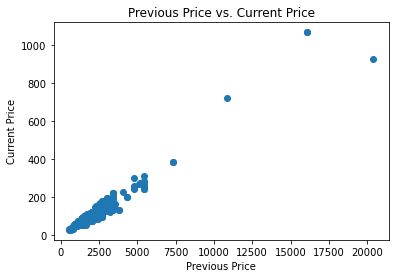

In [35]:
plt.scatter(df['previous_price'], df['current_price'])
plt.title('Previous Price vs. Current Price')
plt.xlabel('Previous Price')
plt.ylabel('Current Price')
plt.show()

In [40]:
df = pd.read_csv('smartphone_Data_with_mean_price.csv')

In [47]:
df.head()

brand  screen_size  ram    rom sim_type  battary   price
0    Tecno         6.80  8.0  128.0     Dual   5000.0  2125.0
1  Infinix         6.82  8.0  128.0     Dual   6000.0  1377.0
2   XIAOMI         6.52  3.0   64.0     Dual   5000.0   930.0
3    Tecno         6.60  4.0  128.0     Dual   5000.0  1449.0
4  Infinix         6.60  2.0   64.0     Dual   5000.0   876.0

### Visualize the distribution of the target variable 'price'

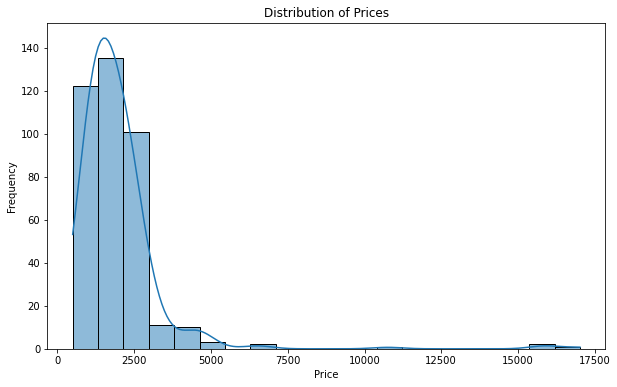

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### the correlation between numerical features

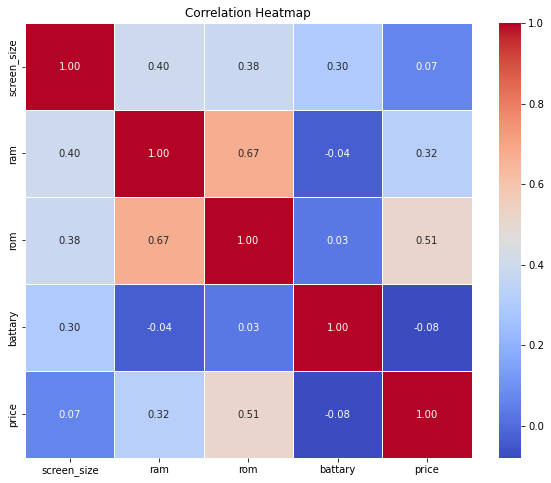

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Box plots for categorical features against the target variable

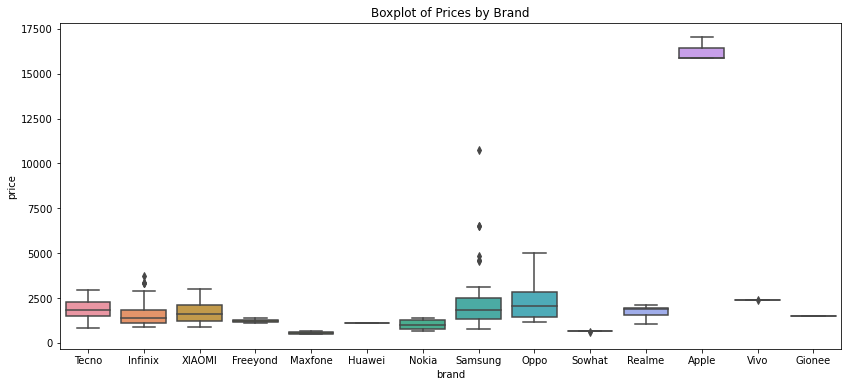

In [50]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='brand', y='price', data=df)
plt.title('Boxplot of Prices by Brand')
plt.show()

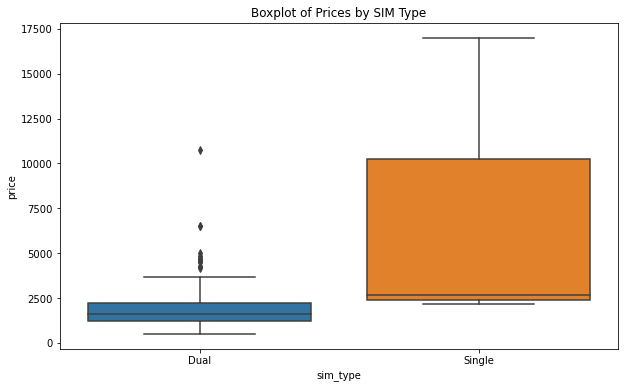

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sim_type', y='price', data=df)
plt.title('Boxplot of Prices by SIM Type')
plt.show()

### Box plot  for RAM distribution by brand

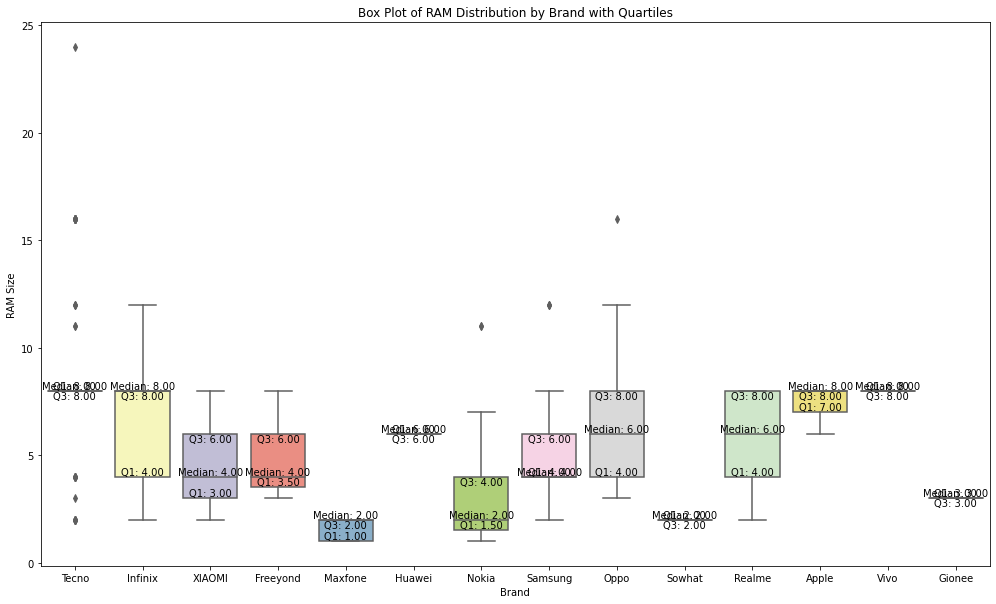

In [48]:
plt.figure(figsize=(17, 10))
ax = sns.boxplot(x='brand', y='ram', data=df, palette='Set3', showfliers=True)

# Annotate quartiles
for brand in df['brand'].unique():
    q1 = df[df['brand'] == brand]['ram'].quantile(0.25)
    q3 = df[df['brand'] == brand]['ram'].quantile(0.75)
    median = df[df['brand'] == brand]['ram'].median()

    ax.text(df['brand'].unique().tolist().index(brand), q1, f'Q1: {q1:.2f}', ha='center', va='bottom')
    ax.text(df['brand'].unique().tolist().index(brand), q3, f'Q3: {q3:.2f}', ha='center', va='top')
    ax.text(df['brand'].unique().tolist().index(brand), median, f'Median: {median:.2f}', ha='center', va='bottom')

plt.title('Box Plot of RAM Distribution by Brand with Quartiles')
plt.xlabel('Brand')
plt.ylabel('RAM Size')
plt.show()

In [52]:
def map_brand_to_numeric(brand):
    brand_mapping = {
        'Maxfone': 1,
        'Infinix': 2,
        'Freeyond': 3,
        'XIAOMI': 4,
        'Tecno': 5,
        'Oppo': 6,
        'Nokia': 7,
        'Samsung': 8,
        'Huawei': 9,
        'Vivo': 10,
        'Realme': 11,
        'Sowhat': 12,
        'Apple': 13,
       'Gionee': 14
    }
    
    return brand_mapping.get(brand, 0)

df['brand'] = df['brand'].apply(map_brand_to_numeric)




In [53]:
def map_sim_type_to_numeric(sim_type):
    sim_type_mapping = {
        'Dual': 1,
        'Single': 2
    }
    
    return sim_type_mapping.get(sim_type, 0)

df['sim_type'] = df['sim_type'].apply(map_sim_type_to_numeric)




In [54]:
df.head()

brand  screen_size  ram    rom  sim_type  battary   price
0      5         6.80  8.0  128.0         1   5000.0  2125.0
1      2         6.82  8.0  128.0         1   6000.0  1377.0
2      4         6.52  3.0   64.0         1   5000.0   930.0
3      5         6.60  4.0  128.0         1   5000.0  1449.0
4      2         6.60  2.0   64.0         1   5000.0   876.0

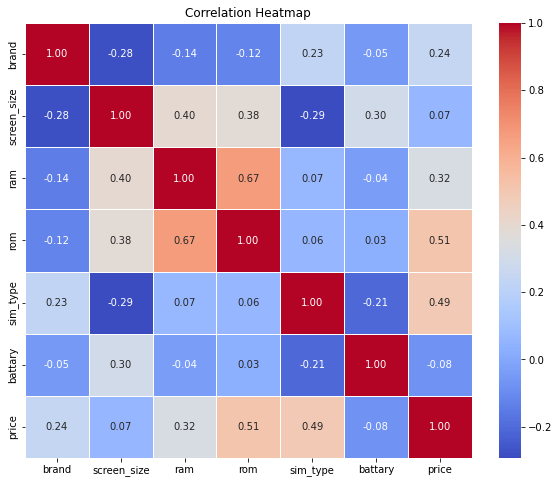

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()